# Projeto 1: Classificação binária brest cancer

## Etapa 1: Importação das bibliotecas

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score

In [6]:
#!pip install torch==1.4.0

In [4]:
import torch
torch.__version__
#!pip install torch==1.4.0

'1.4.0'

In [5]:
import torch.nn as nn

## Etapa 2: Base de dados

In [7]:
np.random.seed(123)
torch.manual_seed(123)

In [8]:
previsores = pd.read_csv('../Bases/entradas_breast.csv')
classe = pd.read_csv('../Bases/saidas_breast.csv')

In [9]:
previsores.shape

(569, 30)

In [10]:
previsores.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,186.0000,275.0000,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,243.0000,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,173.00000
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,198.0000,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,205.0000,0.4000,0.1625,0.2364,0.07678


In [11]:
classe.head()

,0
0,0
1,0
2,0
3,0
4,0


In [12]:
np.unique(classe)

array([0, 1])

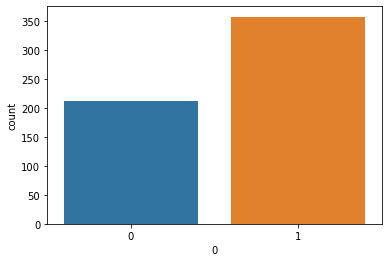

In [13]:
sns.countplot(classe['0']);

In [14]:
previsores_treinamento, previsores_teste, classe_treinamento, classe_teste = train_test_split(previsores,
                                                                                              classe,
                                                                                              test_size = 0.25)

In [15]:
previsores_treinamento.shape

(426, 30)

In [16]:
classe_treinamento.shape

(426, 1)

In [17]:
previsores_teste.shape

(143, 30)

In [18]:
classe_teste.shape

(143, 1)

## Etapa 3: Transformação dos dados para tensores


In [19]:
type(previsores_treinamento)

pandas.core.frame.DataFrame

In [20]:
type(np.array(previsores_treinamento))

numpy.ndarray

In [21]:
previsores_treinamento = torch.tensor(np.array(previsores_treinamento), dtype=torch.float)
classe_treinamento = torch.tensor(np.array(classe_treinamento), dtype = torch.float)

In [29]:
type(previsores_treinamento)

torch.Tensor

In [23]:
type(classe_treinamento)

torch.Tensor

In [31]:
previsores_treinamento[0][0]

tensor(11.5400)

In [32]:
dataset = torch.utils.data.TensorDataset(previsores_treinamento, classe_treinamento)

In [33]:
type(dataset)

torch.utils.data.dataset.TensorDataset

In [35]:
dataset[]

(tensor([2.0310e+01, 2.7060e+01, 1.3290e+02, 1.2880e+03, 1.0000e-01, 1.0880e-01,
         1.5190e-01, 9.3330e-02, 1.8140e-01, 5.5720e-02, 3.9770e-01, 1.0330e+03,
         2.5870e+03, 5.2340e+01, 5.0430e-03, 1.5780e-02, 2.1170e-02, 8.1850e-03,
         1.2820e-02, 1.8920e-03, 2.4330e+01, 3.9160e+01, 1.6230e+02, 1.8440e+03,
         1.5220e-01, 2.9450e-01, 3.7880e-01, 1.6970e-01, 3.1510e-01, 7.9990e-02]),
 tensor([0.]))

In [36]:
train_loader = torch.utils.data.DataLoader(dataset, batch_size=10, shuffle=True)

In [55]:
train_loader

## Etapa 4: Construção do modelo

In [48]:
# 30 -> 16 -> 16 -> 1
# (entradas + saida) / 2 = (30 + 1) / 2 = 16
classificador = nn.Sequential(
    nn.Linear(in_features=30, out_features=16),
    nn.ReLU(),
    nn.Linear(16, 16),
    nn.ReLU(),
    nn.Linear(16, 1),
    nn.Sigmoid()
)

In [49]:
classificador.parameters

<bound method Module.parameters of Sequential(
  (0): Linear(in_features=30, out_features=16, bias=True)
  (1): ReLU()
  (2): Linear(in_features=16, out_features=16, bias=True)
  (3): ReLU()
  (4): Linear(in_features=16, out_features=1, bias=True)
  (5): Sigmoid()
)>

In [50]:
criterion = nn.BCELoss()

In [51]:
optimizer = torch.optim.Adam(classificador.parameters(), lr=0.001, weight_decay=0.0001)

## Etapa 5: Treinamento do modelo

In [61]:
for epoch in range(110):
    running_loss = 0.

    for data in train_loader:
        inputs, labels = data
        #print(inputs)
        #print('-----')
        #print(labels)
        optimizer.zero_grad()

        outputs = classificador(inputs) # classificador.forward(inputs)
        #print(outputs)
        loss = criterion(outputs, labels)
        #print(loss)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    print('Época %3d: perda %.5f' % (epoch+1, running_loss/len(train_loader)))

Época   1: perda 0.14482
Época   2: perda 0.12818
Época   3: perda 0.12249
Época   4: perda 0.11644
Época   5: perda 0.11688
Época   6: perda 0.10881
Época   7: perda 0.12001
Época   8: perda 0.09654
Época   9: perda 0.16795
Época  10: perda 0.11041
Época  11: perda 0.15762
Época  12: perda 0.19398
Época  13: perda 0.16135
Época  14: perda 0.11400
Época  15: perda 0.12094
Época  16: perda 0.11981
Época  17: perda 0.13691
Época  18: perda 0.11878
Época  19: perda 0.10974
Época  20: perda 0.10452
Época  21: perda 0.15215
Época  22: perda 0.10686
Época  23: perda 0.15244
Época  24: perda 0.11800
Época  25: perda 0.10044
Época  26: perda 0.14130
Época  27: perda 0.13204
Época  28: perda 0.11151
Época  29: perda 0.12937
Época  30: perda 0.11032
Época  31: perda 0.09688
Época  32: perda 0.10239
Época  33: perda 0.13252
Época  34: perda 0.10961
Época  35: perda 0.11792
Época  36: perda 0.11013
Época  37: perda 0.11715
Época  38: perda 0.15671
Época  39: perda 0.13340
Época  40: perda 0.12285


## Etapa 6: Visualização dos pesos

In [62]:
# 30 -> 16 -> 16 -> 1
params = list(classificador.parameters())

In [64]:
params

[Parameter containing:
 tensor([[-1.7111e-01, -2.1914e-01, -1.7436e-01,  5.8786e-02, -8.2561e-02,
           5.5988e-02, -8.1989e-02, -3.8591e-02, -2.2379e-01,  2.8651e-01,
          -1.6645e-02,  1.6725e-02, -1.2308e-01, -4.2433e-02,  1.2014e-03,
          -1.6924e-01, -2.7353e-01, -7.0483e-02,  2.4473e-01,  2.0838e-03,
           8.6554e-02, -2.1845e-01, -4.9231e-02,  1.3774e-01,  2.7249e-02,
           2.6629e-01, -1.6458e-02,  5.9859e-02,  3.5591e-01,  4.3350e-02],
         [ 2.3019e-01,  1.8143e-01,  3.7470e-01,  6.5370e-02, -2.9562e-01,
          -2.6313e-01,  6.0064e-03, -1.3060e-01,  1.5223e-01,  3.9381e-01,
          -7.1990e-02, -9.5336e-02, -7.2633e-03,  1.9452e-01, -2.4794e-03,
          -6.9216e-02, -3.2502e-02,  2.3505e-01,  1.8189e-01, -7.1065e-03,
           1.4283e-01, -1.0729e-02,  2.6149e-01, -2.7870e-02,  1.1088e-01,
          -2.2433e-01, -2.5693e-01, -6.0335e-02, -1.0996e-02, -5.8876e-02],
         [-6.1842e-03, -4.5727e-02, -2.8689e-01, -1.3592e-01, -5.0305e-04,


In [65]:
# 30 -> 16 -> 16 -> 1
pesos0 = params[0]
pesos0.shape

torch.Size([16, 30])

In [66]:
print(pesos0)

Parameter containing:
tensor([[-1.7111e-01, -2.1914e-01, -1.7436e-01,  5.8786e-02, -8.2561e-02,
          5.5988e-02, -8.1989e-02, -3.8591e-02, -2.2379e-01,  2.8651e-01,
         -1.6645e-02,  1.6725e-02, -1.2308e-01, -4.2433e-02,  1.2014e-03,
         -1.6924e-01, -2.7353e-01, -7.0483e-02,  2.4473e-01,  2.0838e-03,
          8.6554e-02, -2.1845e-01, -4.9231e-02,  1.3774e-01,  2.7249e-02,
          2.6629e-01, -1.6458e-02,  5.9859e-02,  3.5591e-01,  4.3350e-02],
        [ 2.3019e-01,  1.8143e-01,  3.7470e-01,  6.5370e-02, -2.9562e-01,
         -2.6313e-01,  6.0064e-03, -1.3060e-01,  1.5223e-01,  3.9381e-01,
         -7.1990e-02, -9.5336e-02, -7.2633e-03,  1.9452e-01, -2.4794e-03,
         -6.9216e-02, -3.2502e-02,  2.3505e-01,  1.8189e-01, -7.1065e-03,
          1.4283e-01, -1.0729e-02,  2.6149e-01, -2.7870e-02,  1.1088e-01,
         -2.2433e-01, -2.5693e-01, -6.0335e-02, -1.0996e-02, -5.8876e-02],
        [-6.1842e-03, -4.5727e-02, -2.8689e-01, -1.3592e-01, -5.0305e-04,
          1.34

In [68]:
# 30 -> 16 -> 16 -> 1
bias0 = params[1]
bias0.shape

torch.Size([16])

In [69]:
pesos1 = params[2]
pesos1.shape

torch.Size([16, 16])

In [72]:
bias1 = params[3]
bias1.shape

torch.Size([16])

## Etapa 7: Avaliação do modelo

In [73]:
classificador.eval()

Sequential(
  (0): Linear(in_features=30, out_features=16, bias=True)
  (1): ReLU()
  (2): Linear(in_features=16, out_features=16, bias=True)
  (3): ReLU()
  (4): Linear(in_features=16, out_features=1, bias=True)
  (5): Sigmoid()
)

In [74]:
type(previsores_teste)

pandas.core.frame.DataFrame

In [75]:
previsores_teste = torch.tensor(np.array(previsores_teste), dtype=torch.float)

In [76]:
type(previsores_teste)

torch.Tensor

In [119]:
previsoes = classificador.forward(previsores_teste)

In [120]:
previsoes

tensor([[9.9674e-01],
        [1.0000e+00],
        [4.9938e-01],
        [9.8195e-01],
        [5.9631e-05],
        [9.3977e-01],
        [9.8949e-01],
        [1.0000e+00],
        [8.8587e-01],
        [9.9995e-01],
        [9.8502e-01],
        [1.0000e+00],
        [4.4751e-04],
        [9.9955e-01],
        [9.9980e-01],
        [5.3332e-01],
        [9.9950e-01],
        [1.0000e+00],
        [8.5320e-01],
        [9.9997e-01],
        [3.1181e-12],
        [5.1183e-03],
        [4.9017e-01],
        [1.0000e+00],
        [9.6290e-01],
        [1.7957e-03],
        [2.3670e-01],
        [1.0000e+00],
        [1.4862e-05],
        [9.9990e-01],
        [6.0901e-01],
        [1.0000e+00],
        [8.5025e-01],
        [9.9312e-01],
        [2.7487e-01],
        [9.9981e-01],
        [8.4748e-01],
        [9.9997e-01],
        [9.9864e-01],
        [5.3464e-05],
        [6.8299e-03],
        [6.1545e-01],
        [2.1061e-08],
        [2.6963e-01],
        [8.0166e-06],
        [8

In [121]:
previsoes = np.array(previsoes > 0.8)
previsoes

array([[ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [

In [122]:
classe_teste

,0
333,1
273,1
201,0
178,1
85,0
...,...
230,0
282,0
535,0
436,1


In [123]:
taxa_acerto = accuracy_score(classe_teste, previsoes)
taxa_acerto

0.9090909090909091

In [124]:
matriz = confusion_matrix(classe_teste, previsoes)
matriz

array([[49,  5],
       [ 8, 81]])

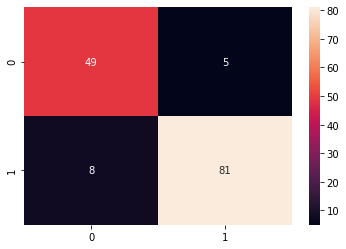

In [125]:
sns.heatmap(matriz, annot=True);